### Prophrt Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx" )
df

,TYPE,Date,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [4]:
df['Date']

0       2016-10-22
1       2016-10-22
2       2016-10-22
3       2016-10-22
4       2016-10-22
           ...    
70363   2018-10-24
70364   2018-10-24
70365   2018-10-24
70366   2018-10-24
70367   2018-10-24
Name: Date, Length: 70368, dtype: datetime64[ns]

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
#df = df.rename(columns={"DATE": "ds", "USAGE": "y"})
df


,TYPE,Date,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [6]:
tarin_df = df.groupby("Date")["USAGE"].sum().reset_index()
train_df = df.rename(columns={"Date": "ds", "USAGE": "y"})
train_df

,TYPE,ds,START TIME,END TIME,y,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [7]:
model = Prophet()
model.fit(train_df)

18:59:18 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = model.make_future_dataframe(periods=30)

In [9]:
forecast = model.predict(future)

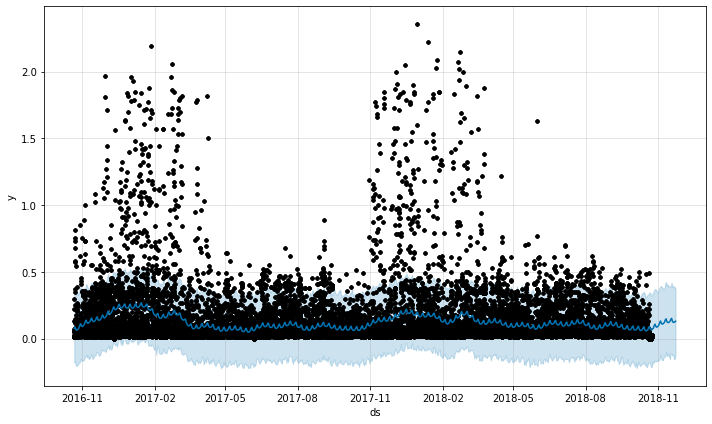

In [10]:
fig = model.plot(forecast)
plt.show()

In [11]:
# Display the forecast for the specified future dates
forcast_df=print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds      yhat  yhat_lower  yhat_upper
0   2016-10-22  0.075875   -0.178562    0.337511
1   2016-10-23  0.085693   -0.168349    0.353308
2   2016-10-24  0.068164   -0.204390    0.328128
3   2016-10-25  0.062610   -0.204190    0.323717
4   2016-10-26  0.065272   -0.202489    0.345679
..         ...       ...         ...         ...
758 2018-11-19  0.130616   -0.128489    0.386088
759 2018-11-20  0.121923   -0.120484    0.397405
760 2018-11-21  0.121278   -0.156585    0.380351
761 2018-11-22  0.124024   -0.153506    0.388546
762 2018-11-23  0.130209   -0.129840    0.372017

[763 rows x 4 columns]


In [12]:
print(forecast[['ds', ]])

            ds
0   2016-10-22
1   2016-10-23
2   2016-10-24
3   2016-10-25
4   2016-10-26
..         ...
758 2018-11-19
759 2018-11-20
760 2018-11-21
761 2018-11-22
762 2018-11-23

[763 rows x 1 columns]


In [13]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] > 0) & (forecast['yhat_upper'] > 0)]

# Display the filtered DataFrame
positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
57,2016-12-18,0.128146,0.007022,0.508148,0.128146,0.128146,0.129540,0.129540,0.129540,0.019489,0.019489,0.019489,0.110051,0.110051,0.110051,0.0,0.0,0.0,0.257686
64,2016-12-25,0.139169,0.008818,0.524203,0.139169,0.139169,0.120572,0.120572,0.120572,0.019489,0.019489,0.019489,0.101083,0.101083,0.101083,0.0,0.0,0.0,0.259741
70,2016-12-31,0.148616,0.001884,0.504887,0.148616,0.148616,0.102149,0.102149,0.102149,0.012311,0.012311,0.012311,0.089838,0.089838,0.089838,0.0,0.0,0.0,0.250765
78,2017-01-08,0.156373,0.023072,0.510562,0.156373,0.156373,0.104810,0.104810,0.104810,0.019489,0.019489,0.019489,0.085321,0.085321,0.085321,0.0,0.0,0.0,0.261183
91,2017-01-21,0.168979,0.000862,0.509043,0.168979,0.168979,0.085689,0.085689,0.085689,0.012311,0.012311,0.012311,0.073378,0.073378,0.073378,0.0,0.0,0.0,0.254668
92,2017-01-22,0.169949,0.002518,0.518734,0.169949,0.169949,0.089393,0.089393,0.089393,0.019489,0.019489,0.019489,0.069904,0.069904,0.069904,0.0,0.0,0.0,0.259342


In [14]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] < 0) & (forecast['yhat_upper'] < 0)]


positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [19]:
# Extract actual values for the forecast period (assuming they are available)
actual_values = df[df['Date'] >= forecast['ds'].min()]['USAGE'].values

# Ensure lengths are consistent
if len(actual_values) >= len(forecast):
    # Trim actual values to match forecast length
    actual_values = actual_values[:len(forecast)]

    # Calculate metrics
    mse = mean_squared_error(actual_values, forecast['yhat'].values)
    rmse = np.sqrt(mse)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
else:
    print("Lengths of actual_values and forecast are inconsistent.")

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.16


# LSTM

C:\Users\Darshan\AppData\Local\Temp\ipykernel_14620\1826388540.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


Epoch 1/50
1759/1759 [==============================] - 25s 12ms/step - loss: 0.0033 - val_loss: 4.7869e-04
Epoch 2/50
1759/1759 [==============================] - 21s 12ms/step - loss: 0.0024 - val_loss: 4.6445e-04
Epoch 3/50
1759/1759 [==============================] - 21s 12ms/step - loss: 0.0023 - val_loss: 4.7080e-04
Epoch 4/50
1759/1759 [==============================] - 20s 11ms/step - loss: 0.0023 - val_loss: 4.6677e-04
Epoch 5/50
1759/1759 [==============================] - 20s 12ms/step - loss: 0.0022 - val_loss: 4.5983e-04
Epoch 6/50
1759/1759 [==============================] - 20s 12ms/step - loss: 0.0021 - val_loss: 4.5511e-04
Epoch 7/50
1759/1759 [==============================] - 20s 12ms/step - loss: 0.0020 - val_loss: 4.5142e-04
Epoch 8/50
1759/1759 [==============================] - 20s 12ms/step - loss: 0.0020 - val_loss: 4.4107e-04
Epoch 9/50
1759/1759 [==============================] - 21s 12ms/step - loss: 0.0019 - val_loss: 4.3453e-04
Epoch 10/50
1759/1759 [=====

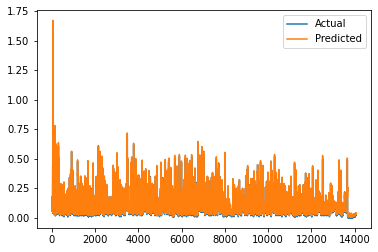

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])

# Convert "START TIME" to timedelta
df["START TIME"] = pd.to_timedelta(df["START TIME"].astype(str))

# Combine "Date" and "START TIME" to create "Datetime"
df["Datetime"] = df["Date"] + df["START TIME"]

# Extract relevant features
data = df[["Datetime", "USAGE"]].set_index("Datetime")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append((seq, label))
    return np.array(sequences)

# Hyperparameters
seq_length = 10
batch_size = 32
epochs = 50

# Create sequences
sequences = create_sequences(data_scaled, seq_length)

# Split into features and labels
X = np.array([seq for seq, _ in sequences])
y = np.array([label for _, label in sequences])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], shuffle=False)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Visualize the results
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


### ARIMA & SARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA Metrics:
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11

SARIMA Metrics:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


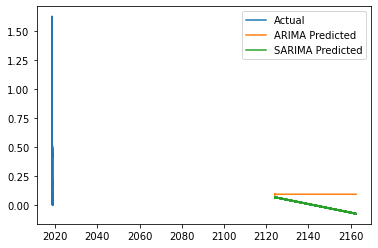

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])

# Extract relevant features
data = df[["Date", "USAGE"]].set_index("Date")

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ARIMA model
order_arima = (5, 1, 0)  # Example order, you may need to tune this
arima_model = sm.tsa.ARIMA(train, order=order_arima)
arima_fit = arima_model.fit()

# SARIMA model
order_sarima = (1, 1, 1, 12)  # Example order, you may need to tune this
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Predictions
arima_pred = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
sarima_pred = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate performance
mae_arima = mean_absolute_error(test, arima_pred)
mse_arima = mean_squared_error(test, arima_pred)
rmse_arima = sqrt(mse_arima)

mae_sarima = mean_absolute_error(test, sarima_pred)
mse_sarima = mean_squared_error(test, sarima_pred)
rmse_sarima = sqrt(mse_sarima)

print(f'ARIMA Metrics:')
print(f'Mean Absolute Error (MAE): {mae_arima:.2f}')
print(f'Mean Squared Error (MSE): {mse_arima:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_arima:.2f}')

print('\nSARIMA Metrics:')
print(f'Mean Absolute Error (MAE): {mae_sarima:.2f}')
print(f'Mean Squared Error (MSE): {mse_sarima:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_sarima:.2f}')

# Visualize the results
plt.plot(test, label='Actual')
plt.plot(arima_pred, label='ARIMA Predicted')
plt.plot(sarima_pred, label='SARIMA Predicted')
plt.legend()
plt.show()


### XGBoost model

C:\Users\Darshan\AppData\Local\Temp\ipykernel_14620\2482462654.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'lag_{i}'] = train['USAGE'].shift(i)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_14620\2482462654.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'lag_{i}'] = test['USAGE'].shift(i)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_14620\2482462654.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

XGBoost Metrics:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05


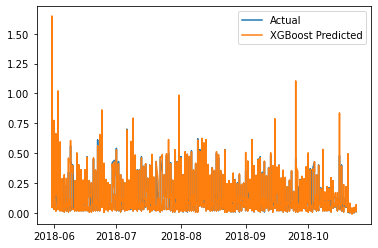

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])

# Extract relevant features
data = df[["Date", "USAGE"]].set_index("Date")

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Feature engineering: creating lag features
for i in range(1, 11):
    train[f'lag_{i}'] = train['USAGE'].shift(i)
    test[f'lag_{i}'] = test['USAGE'].shift(i)

# Drop rows with NaN values introduced by lag features
train = train.dropna()
test = test.dropna()

# Separate features and target
X_train, y_train = train.drop("USAGE", axis=1), train["USAGE"]
X_test, y_test = test.drop("USAGE", axis=1), test["USAGE"]

# Create and train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = sqrt(mse_xgb)

print(f'XGBoost Metrics:')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'Mean Squared Error (MSE): {mse_xgb:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')

# Visualize the results
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost Predicted')
plt.legend()
plt.show()


In [29]:
print(data.info())

# Display the first few rows of the dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70368 entries, 2016-10-22 to 2018-10-24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USAGE       70368 non-null  float64
 1   START TIME  70368 non-null  object 
 2   END TIME    70368 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.1+ MB
None
            USAGE START TIME  END TIME
Date                                  
2016-10-22   0.01   00:00:00  00:14:00
2016-10-22   0.01   00:15:00  00:29:00
2016-10-22   0.01   00:30:00  00:44:00
2016-10-22   0.01   00:45:00  00:59:00
2016-10-22   0.01   01:00:00  01:14:00


### VAR model

ADF Statistic for USAGE: -25.238587018974524
p-value: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


VAR Metrics:
Mean Absolute Error (MAE): 712.10
Mean Squared Error (MSE): 507101.00
Root Mean Squared Error (RMSE): 712.11


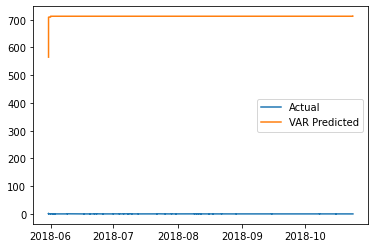

In [34]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")  # Replace with your file path
df["Date"] = pd.to_datetime(df["Date"])

# Extract relevant features
df["START TIME"] = df["START TIME"].apply(lambda x: x.hour * 60 + x.minute)
df["END TIME"] = df["END TIME"].apply(lambda x: x.hour * 60 + x.minute)

data = df[["Date", "USAGE", "START TIME", "END TIME"]].set_index("Date")

# Check for stationarity
result_adf_usage = adfuller(data["USAGE"])
print(f'ADF Statistic for USAGE: {result_adf_usage[0]}')
print(f'p-value: {result_adf_usage[1]}')

# If needed, perform differencing to make the time series stationary
# data_diff = data.diff().dropna()

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VAR model
model = VAR(train)
order_var = 2  # Example order, you may need to tune this
var_fit = model.fit(order_var)

# Forecast
lag_order = var_fit.k_ar
var_pred = var_fit.forecast(train.values[-lag_order:], len(test))

# Inverse transform the predictions to the original scale (if differencing was applied)
# var_pred = var_pred.cumsum().add(train.iloc[-1]["USAGE"])

# Evaluate performance
mae_var = mean_absolute_error(test["USAGE"], var_pred[:, 1])  # Adjust index if needed
mse_var = mean_squared_error(test["USAGE"], var_pred[:, 1])
rmse_var = sqrt(mse_var)

print(f'VAR Metrics:')
print(f'Mean Absolute Error (MAE): {mae_var:.2f}')
print(f'Mean Squared Error (MSE): {mse_var:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_var:.2f}')

# Visualize the results
plt.plot(test["USAGE"], label='Actual')
plt.plot(test.index, var_pred[:, 1], label='VAR Predicted')  # Adjust index if needed
plt.legend()
plt.show()


### Exponential Smoothing

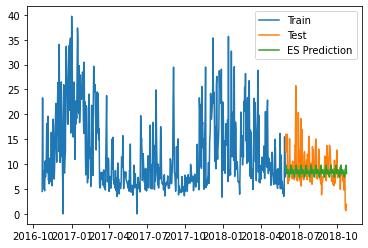

C:\Users\Darshan\AppData\Local\Temp\ipykernel_14620\865875619.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


Epoch 1/50
19/19 [==============================] - 2s 18ms/step - loss: 0.1488 - val_loss: 0.0285
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0590 - val_loss: 0.0093
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0314 - val_loss: 0.0103
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.0085
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.0090
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.0082
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0081
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0241 - val_loss: 0.0079
Epoch 9/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0238 - val_loss: 0.0077
Epoch 10/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0076
Epoch 11/50
19/19 

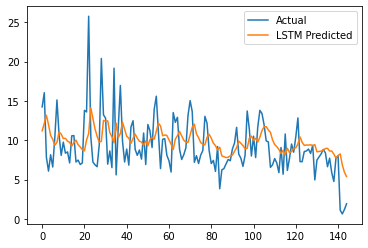

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])

# Extract relevant features
data = df[["Date", "USAGE"]].set_index("Date")

# Downsample the data to daily frequency
data_resampled = data.resample('D').sum()

# Split into training and testing sets
train_size = int(len(data_resampled) * 0.8)
train, test = data_resampled.iloc[:train_size], data_resampled.iloc[train_size:]

# Apply Exponential Smoothing
model_es = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()

# Make predictions using integers for start and end
start_idx = test.index[0]
end_idx = test.index[-1]
pred_es = fit_es.predict(start=start_idx, end=end_idx)

# Plot ES predictions
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred_es, label='ES Prediction')
plt.legend()
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_resampled)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append((seq, label))
    return np.array(sequences)

# Hyperparameters
seq_length = 10
batch_size = 32
epochs = 50

# Create sequences
sequences = create_sequences(data_scaled, seq_length)

# Split into features and labels
X = np.array([seq for seq, _ in sequences])
y = np.array([label for _, label in sequences])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test, y_test), callbacks=[early_stopping], shuffle=False)

# Make LSTM predictions
predictions_rnn = model_rnn.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_rnn = scaler.inverse_transform(predictions_rnn)
y_test_original_rnn = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for LSTM
rmse_rnn = np.sqrt(mean_squared_error(y_test_original_rnn, predictions_rnn))
print(f'Root Mean Squared Error (RMSE) for LSTM: {rmse_rnn:.2f}')

# Visualize the results for LSTM
plt.plot(y_test_original_rnn, label='Actual')
plt.plot(predictions_rnn, label='LSTM Predicted')
plt.legend()
plt.show()
